# Auxiliary

In [445]:
import numpy as np
import scipy
import scipy.special

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import project
from project.utils import *

In [3]:
%load_ext autoreload
%autoreload 2

# Models

In [456]:
from project.models.pbc import Box
from project.models.lj import LJFluid
from project.models.chain import GaussianChain
from project.models.ising import IsingModel
from project.models.nematic import NematicLattice

## LJ Fluid

In [73]:
lj = LJFluid(dim = 2)
x = lj.init_coords(4, init_try = 5000)

In [74]:
lj.energy(x)

-2.6171842482564043

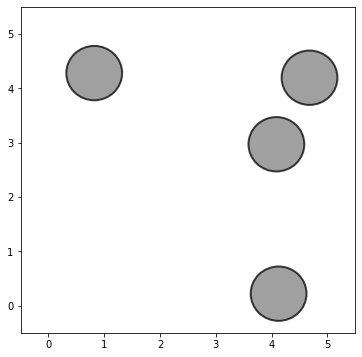

In [75]:
lj.draw_config(x)

In [101]:
idx, new = lj.step(x)

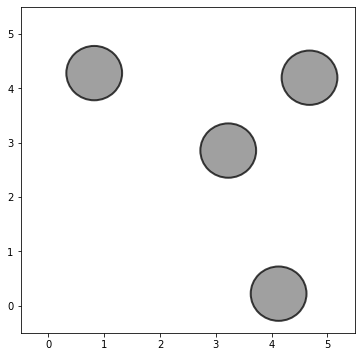

In [102]:
lj.draw_config(new)

## Gaussian Chain

In [110]:
chain = GaussianChain(r0 = 1.5, k = 10.0, L = 5)

chain.params

{'sig': 1.0, 'eps': 1.0, 'r0': 1.5, 'k': 10.0, 'L': 5}

In [114]:
N = 50
x = chain.init_coords(N)

chain.energy(x)

chain.energy_idx(x, 1)

-5.665211996199572

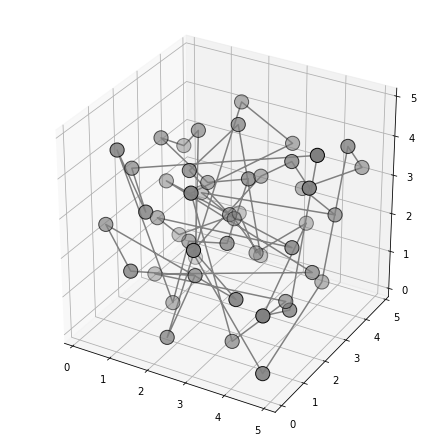

In [115]:
chain.draw_config(x)

In [118]:
%time chain.oprm(x)

CPU times: user 980 µs, sys: 361 µs, total: 1.34 ms
Wall time: 1.03 ms


37.57190312986356

In [119]:
chain.step(x)

(20, array([[2.5       , 2.5       , 2.5       ],
        [1.78576823, 1.94434093, 3.6962926 ],
        [2.39472596, 3.06357278, 4.48780417],
        [2.43229024, 4.06283342, 0.60586816],
        [2.139785  , 3.32731791, 1.88001792],
        [0.82521527, 4.0487988 , 1.84298095],
        [4.66713304, 3.49069596, 2.61587601],
        [3.39525086, 4.28336364, 2.55268065],
        [4.65103679, 4.79599018, 3.19316151],
        [4.8086211 , 3.751936  , 4.2585807 ],
        [4.28345998, 3.65930949, 0.66058859],
        [4.7670955 , 0.0556205 , 0.40288287],
        [0.71946631, 3.93195276, 0.11940332],
        [1.34971941, 3.06626352, 4.06899237],
        [0.4913851 , 3.82632909, 3.10174755],
        [0.65387026, 2.58031383, 3.92092064],
        [1.65335337, 2.95847754, 2.86829264],
        [2.95123323, 2.56254947, 3.50762731],
        [2.88061325, 1.73732047, 2.25702349],
        [1.58235965, 2.22531397, 1.68570927],
        [0.66879914, 1.89595586, 0.14701352],
        [0.58555088, 0.8710414

## Ising Model

In [131]:
ising = IsingModel(h = 1.0)

ising.params

{'h': 1.0, 'J': 1.0}

In [132]:
x = ising.init_coords(4)

ising.energy(x)

2.0

In [133]:
%time ising.energy_idx(x, 0)

CPU times: user 83 µs, sys: 8 µs, total: 91 µs
Wall time: 86.1 µs


-1.0

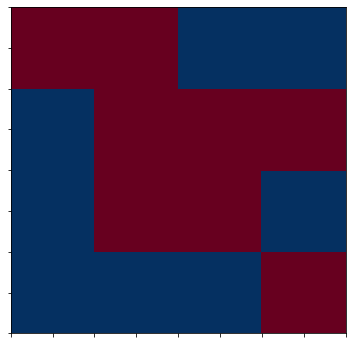

In [134]:
ising.draw_config(x)

In [135]:
ising.oprm(x)

0.0

In [137]:
ising.step(x)

(4, array([[-1, -1, -1,  1],
        [ 1,  1,  1, -1],
        [-1,  1,  1,  1],
        [ 1,  1, -1, -1]]))

## Nematic Lattice 

In [866]:
nem = NematicLattice(h = 10.0)

In [864]:
x = nem.init_coords(5)

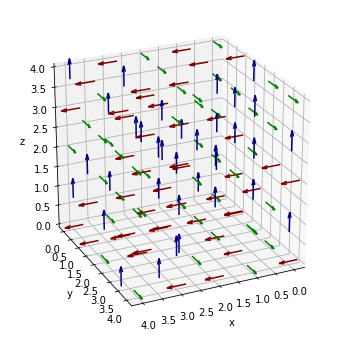

In [865]:
nem.draw_config(x)

In [473]:
x = nem.init_coords(3)

In [475]:
%time idx, new = nem.step(x)

CPU times: user 231 µs, sys: 50 µs, total: 281 µs
Wall time: 342 µs


In [487]:
%time nem.energy_idx(x, idx)

CPU times: user 165 µs, sys: 35 µs, total: 200 µs
Wall time: 178 µs


0.21378426479577747

In [485]:
%time nem.energy(new)

CPU times: user 2.25 ms, sys: 871 µs, total: 3.12 ms
Wall time: 2.35 ms


0.18645716732459502

# MCMC

In [541]:
from project.models.pbc import Box
from project.models.lj import LJFluid
from project.models.chain import GaussianChain
from project.models.ising import IsingModel
from project.models.nematic import NematicLattice

## Metropolis

In [867]:
from project.mcmc.metropolis import MetropolisSampler

In [870]:
model = NematicLattice(h = 10.0)

x0 = model.init_coords(10)

met = MetropolisSampler(model, x0, temperature = 1.0, stride = 100)

In [871]:
met.run(25000, verbose = 5000)

Step 0 / 25000
Step 5000 / 25000
Step 10000 / 25000
Step 15000 / 25000
Step 20000 / 25000


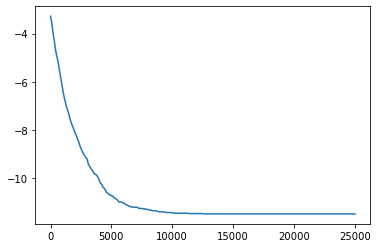

In [872]:
plt.plot(met.steps, met.etraj)

plt.show()

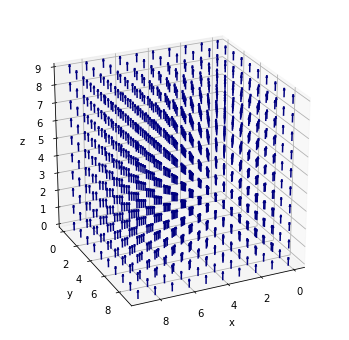

In [873]:
met.model.draw_config(met.traj[-5])

## REMC

In [93]:
from project.mcmc.metropolis import ReplicaMetropolisSampler

In [102]:
model = IsingModel(J = 2.5)

x0 = model.init_coords(10)

remc = ReplicaMetropolisSampler(model, x0, temperatures = np.arange(1.0, 5.5, 1.0), stride = 10)

In [103]:
remc.run(5, 5000, verbose = 1000)

In [104]:
remc.etrajs

[array([-0.15, -0.3 , -0.45, ..., -2.5 , -2.5 , -2.5 ]),
 array([-0.15, -0.35, -0.45, ..., -2.3 , -2.3 , -2.3 ]),
 array([-0.15, -0.25, -0.3 , ..., -1.3 , -1.4 , -1.45]),
 array([-0.15, -0.35, -0.5 , ..., -0.9 , -0.95, -0.95]),
 array([-0.15, -0.4 , -0.4 , ..., -0.55, -0.5 , -0.5 ])]

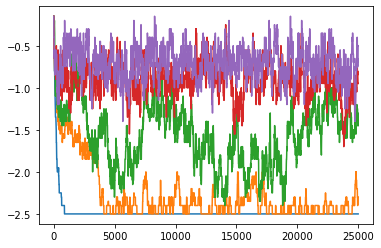

In [106]:
for i in range(len(remc.etrajs)):
    plt.plot(remc.steps, remc.etrajs[i])
    
plt.show()

## Wang Landau

In [1208]:
from project.mcmc.wang_landau import WangLandauSampler

In [1221]:
model = IsingModel(J = 0.75, h = 0.01)

N = 5
x0 = model.init_coords(N, seed = 1234)

wl = WangLandauSampler(model, x0, temperature = 1.0, bounds = (-1.0, 1.0), nbins = N**2)

In [1222]:
wl.run(1.5e6, 1000, stride = 10000, verbose = True)

Starting at WL-Epoch 1.
Entering WL-Epoch 2 (step = 3000 / 1500000).
Entering WL-Epoch 3 (step = 16000 / 1500000).
Entering WL-Epoch 4 (step = 26000 / 1500000).
Entering WL-Epoch 5 (step = 38000 / 1500000).
Entering WL-Epoch 6 (step = 54000 / 1500000).
Entering WL-Epoch 7 (step = 67000 / 1500000).
Entering WL-Epoch 8 (step = 89000 / 1500000).
Entering WL-Epoch 9 (step = 120000 / 1500000).
Entering WL-Epoch 10 (step = 146000 / 1500000).
Entering WL-Epoch 11 (step = 183000 / 1500000).
Entering WL-Epoch 12 (step = 227000 / 1500000).
Entering WL-Epoch 13 (step = 291000 / 1500000).
Entering WL-Epoch 14 (step = 567000 / 1500000).
Entering WL-Epoch 15 (step = 623000 / 1500000).
Entering WL-Epoch 16 (step = 702000 / 1500000).
Entering WL-Epoch 17 (step = 774000 / 1500000).
Entering WL-Epoch 18 (step = 846000 / 1500000).
Entering WL-Epoch 19 (step = 909000 / 1500000).
Entering WL-Epoch 20 (step = 948000 / 1500000).
Entering WL-Epoch 21 (step = 990000 / 1500000).
Entering WL-Epoch 22 (step = 101

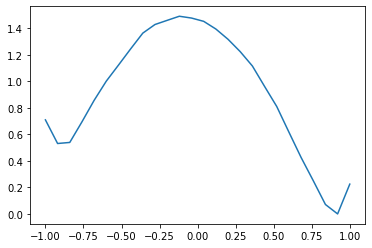

In [1223]:
plt.plot(wl.bins, wl.gtraj[-1])

In [976]:
np.min(wl.otraj), np.max(wl.otraj)

(-0.9444444444444444, 1.0)

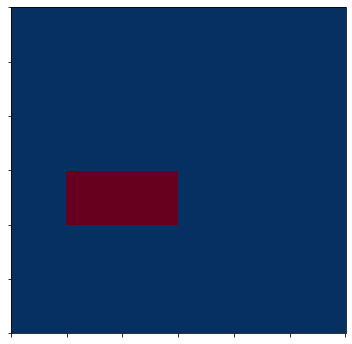

In [977]:
model.draw_config(wl.traj[-1])